Python scripts to create figures fot LaTeX

In [1]:
from importlib import reload
import sys

In [2]:
sys.path.append('/home/sejin8642/gd/ftnmr/ft')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

importing and instantiating fid module

In [4]:
import fid

In [5]:
s = fid.fid(shift=0.02, nsp=120)

In [31]:
x[-1] - x[0]

11997.735683652169

In [26]:
len(y)

1840

In [6]:
x = s.t

In [7]:
y = s().real

Plotting s vs. t for LaTeX

In [8]:
# default plt style to fix jupyter notebook margin issue when plotting
plt.style.use('default')

# LaTeX font with size 9
plt.rcParams.update({
    "text.usetex": True,
    "font.family": 'serif',
    "font.size": 9})

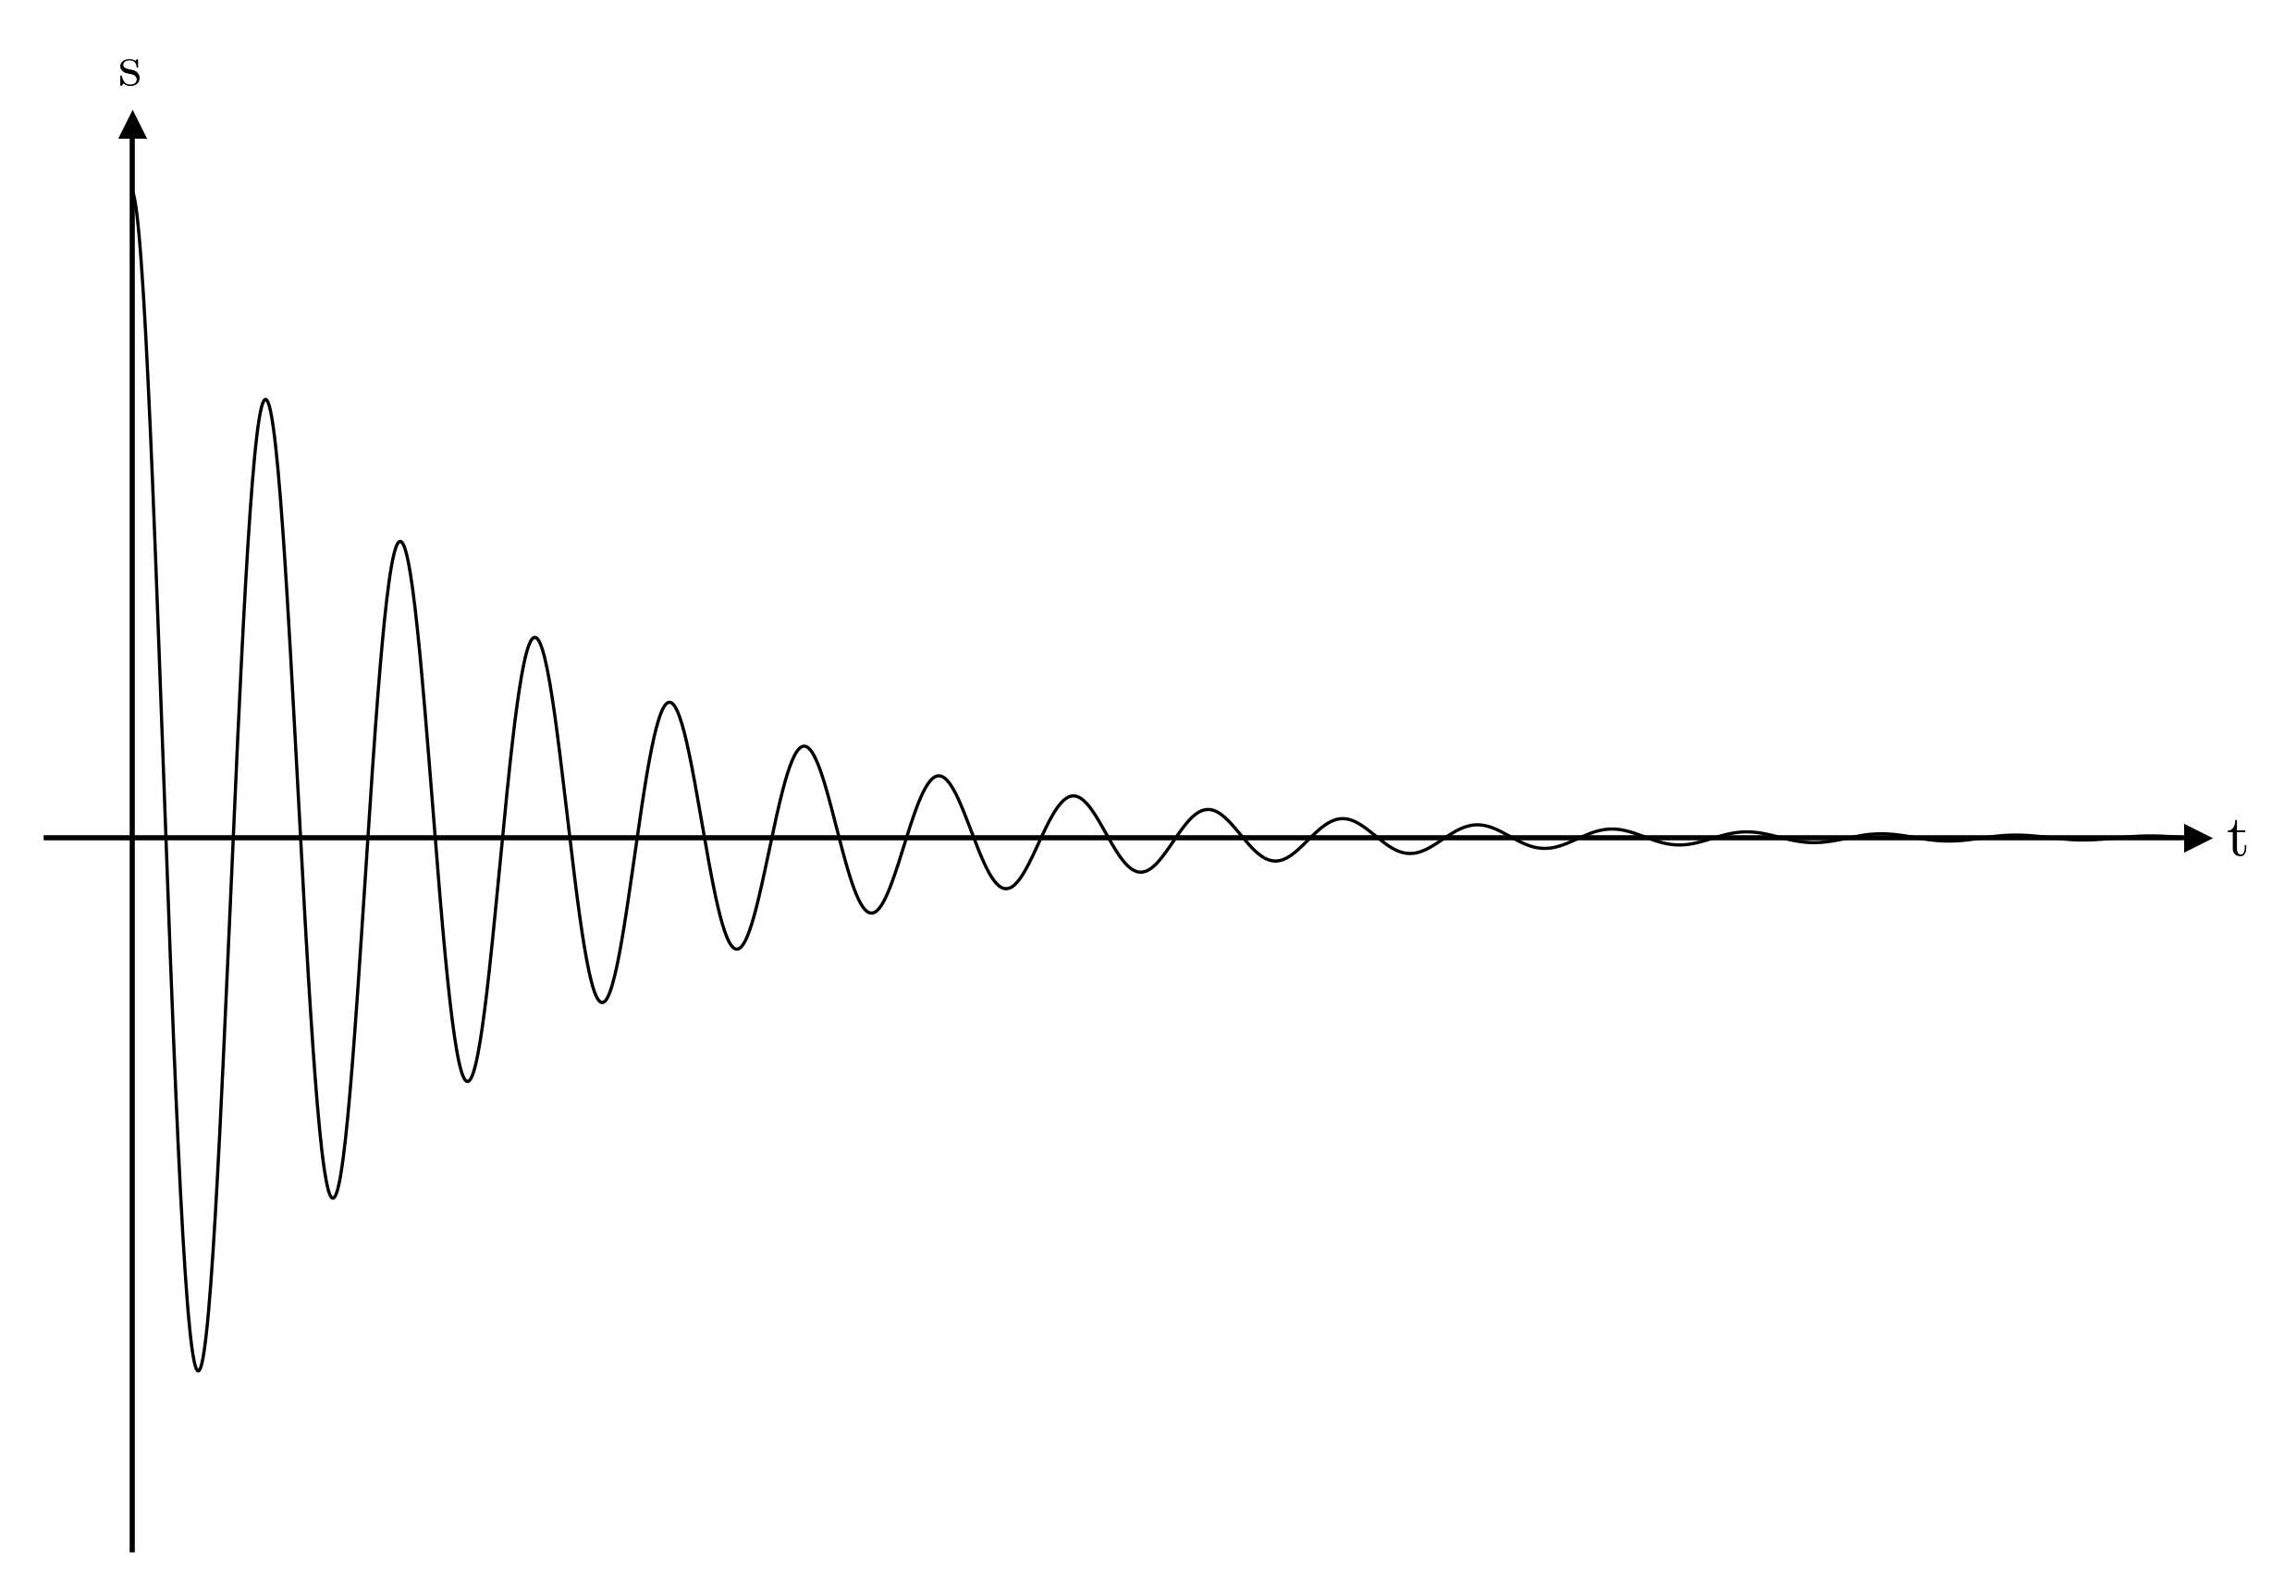

In [9]:
fig = plt.figure(figsize=(6,4), dpi=500)
ax = fig.add_subplot(111)

# plots y vs. x in black line with linesize 2 with the given axes
plt.plot(x, y, 'k-', linewidth=.5)
plt.axis([-500, 12000, -1.1, 1.1])

# change the spine linewidth
plt.rcParams['axes.linewidth'] = 0.2

# moves the bottom spine to the center and the left spine to t = 0
ax.spines['left'].set_position(('data', 0)) 
ax.spines['bottom'].set_position(('data', 0)) 

# deletes top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# changes the size of ticks (both major and minor) to zero
ax.tick_params(axis=u'both', which=u'both', length=0)

# no tick labels
plt.xticks([])
plt.yticks([])

# labels for x and y axes with their position coordinates
ax.xaxis.set_label_coords(1.02, 0.515)
ax.set_xlabel('t')
ax.yaxis.set_label_coords(500/12500, 1.02)
ax.set_ylabel('s', rotation=0)

# arrows at the tip of the axis lines
ax.plot(1, 0, ">k", markersize=3, transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", markersize=3, transform=ax.get_xaxis_transform(), clip_on=False)

# save the figure as eps vector image
# plt.savefig("sed.eps", format='eps', transparent=True)
plt.show()

In [23]:
len(y)

1840

In [115]:
def graph(x, y, xlabel='x', ylabel='y', save=False, filename='figure.esp'):
    # LaTeX font with size 9
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": 'serif',
        "font.size": 9})
    
    # plots y vs. x in black line with linesize 2 with the given axes
    fig = plt.figure(figsize=(6,4), dpi=500)
    ax = fig.add_subplot(111)
    
    # minimums and maximums of x and y 
    xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
    
    # reset minimum and maximum of y if y-range does not contain 0
    if 0 < ymin: ymin = -0.1*ymax
    if ymax < 0: ymax = -0.1*ymin
        
    # configures plot axes, labels and their positions with arrow axis tips
    if (xmin <= 0) and (0 <= xmax):
        ax.spines['left'].set_position(('data', 0)) 
        ax.yaxis.set_label_coords(-xmin/(xmax - xmin), 1.02)
        ax.set_ylabel(ylabel, rotation=0)
        ax.plot(0, 1, "^k", markersize=3, transform=ax.get_xaxis_transform(), clip_on=False)
    else:
        ax.spines['left'].set_visible(False)
        ax.set_ylabel.set_visible(False)
    
    ax.spines['bottom'].set_position(('data', 0)) 
    ax.xaxis.set_label_coords(1.02, -ymin/(ymax - ymin) + 0.02)
    ax.set_xlabel(xlabel)
    ax.plot(1, 0, ">k", markersize=3, transform=ax.get_yaxis_transform(), clip_on=False)

    # plots y vs. x in black line with linesize 2 with the given axes
    plt.plot(x, y, 'k-', linewidth=.5)
    plt.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])

    # change the spine linewidth
    plt.rcParams['axes.linewidth'] = 0.2

    # deletes top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # changes the size of ticks (both major and minor) to zero
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # no tick labels
    plt.xticks([])
    plt.yticks([])

    # save the figure as eps vector image if save==True
    if (save == True): 
        plt.savefig(filename, format='eps', transparent=True)
    
    # show the plot
    plt.show()